# LBL - problem 1 - Messier

In [1]:
import numpy as np
from scipy import linalg
import copy
import matplotlib.pyplot as plt

In [2]:
# @title
#
# NuOsc.py created by Peter Denton, BNL
#
# Thank you, Peter, for making this code available to INSS!
#
# Peter has more code available here:
#
# https://github.com/PeterDenton/Nu-Pert-Compare/
#
import numpy as np
from scipy import linalg

eVsqkm_to_GeV = 1e-9 / 1.97327e-7 * 1e3 # converts eV^2 km to GeV

# The oscillation probability from flavor alpha to flavor beta through constant matter density for some set of oscillation parameters
def Probability(alpha, beta, L, E, rho, op):
	"""
	alpha and beta are the flavors:
		0: e
		1: mu
		2: tau
	L is the distance traveled in km
	E is the neutrino energy in GeV
		For anti-neutrinos use E<0
	rho is the average density along propagation in g/cc
	op is the dictionary of the six oscillation parameters
	Take Ye, the electron fraction, to be 0.5
	"""

	# compute the mixing angles and complex phase parameters
	t23 = np.arcsin(np.sqrt(op["s23sq"]))
	t13 = np.arcsin(np.sqrt(op["s13sq"]))
	t12 = np.arcsin(np.sqrt(op["s12sq"]))
	c23 = np.cos(t23)
	s23 = np.sin(t23)
	c13 = np.cos(t13)
	s13 = np.sin(t13)
	c12 = np.cos(t12)
	s12 = np.sin(t12)
	eimd = np.exp(-1j * op["delta"])
	eid = np.exp(1j * op["delta"])

	# compute the rotation matrices and the PMNS matrix
	U23 = np.array([[1, 0, 0], [0, c23, s23], [0, -s23, c23]])
	U13 = np.array([[c13, 0, s13 * eimd], [0, 1, 0], [-s13 * eid, 0, c13]])
	U12 = np.array([[c12, s12, 0], [-s12, c12, 0], [0, 0, 1]])
	UPMNS = U23 @ U13 @ U12

	# compute the M^2 matrix
	Msq = np.array([[0, 0, 0], [0, op["Dmsq21"], 0], [0, 0, op["Dmsq31"]]])

	# compute the Hamiltonians, first the vacuum part then the matter part
	Hvac = UPMNS @ Msq @ np.conj(np.transpose(UPMNS)) / (2 * E)
	Hmat = np.zeros((3, 3))
	Ye = 0.5
	a = 1.52e-4 * Ye * rho * E # a is in eV^2
	Hmat[0, 0] = a / (2 * E)
	H = Hvac + Hmat # units are eV^2/GeV

	# compute the amplitude
	A = linalg.expm(1j * L * H * eVsqkm_to_GeV)

	# the probability is the amplitude squared
	return abs(A[alpha, beta]) ** 2

# An example set of oscillation parameters set to the global fit from the Valencia group: https://globalfit.astroparticles.es/2018/02/09/empty/
op_valencia = {}
op_valencia["Dmsq21"] = 7.5e-5 # units for the Dmsq's are eV^2
op_valencia["Dmsq31"] = 2.55e-3
op_valencia["s12sq"]  = 0.318
op_valencia["s23sq"]  = 0.574
op_valencia["s13sq"]  = 0.022
op_valencia["delta"]  = -5 * np.pi / 7 # Set to some random number that doesn't set sin(delta) or cos(delta) to 0 or 1 which can cause accidental cancellations

{'Dmsq21': 7.5e-05, 'Dmsq31': 0.00255, 's12sq': 0.318, 's23sq': 0.574, 's13sq': 0.022, 'delta': -2.243994752564138}
{'Dmsq21': 7.5e-05, 'Dmsq31': -0.002475, 's12sq': 0.318, 's23sq': 0.574, 's13sq': 0.022, 'delta': -2.243994752564138}


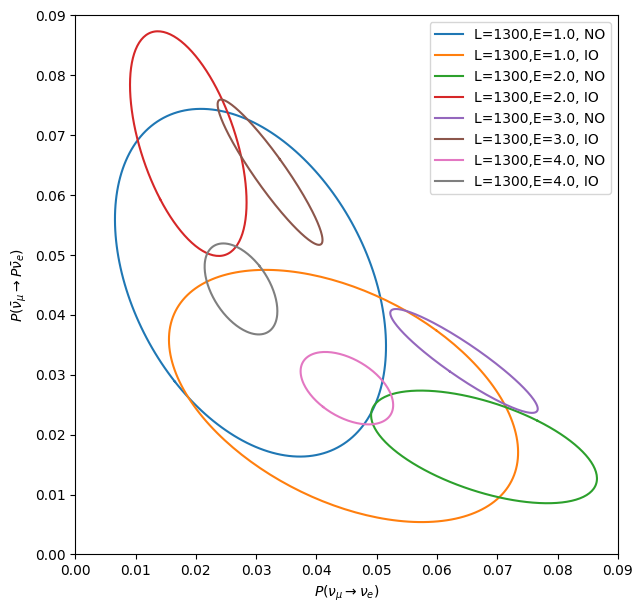

In [14]:
import copy
#
# Make ourselves a copy of the oscillation parameters. Flip the masses for the
# inverted ordering keeping deltam^2_32 the same.
#
oscpNO = copy.deepcopy(op_valencia)
oscpIO = copy.deepcopy(op_valencia)
oscpIO['Dmsq31'] = oscpIO['Dmsq21']-oscpIO['Dmsq31']
print(oscpNO)
print(oscpIO)
#
# Choose a baseline and energies
#
L  = 1300 # km
# Es = [1.0, 1.5, 2.0, 2.5, 3.0]
Es = [1.0, 2.0, 3.0, 4.0]
#
# Get a range of delta CP values to plot for
#
import math
import numpy as np
deltaCP = math.pi*np.arange(-1,1.01,0.01)
#
# Make and fill arrays for the oscillation probabilities
#
PmeNO  = np.empty(len(deltaCP))
PmebNO = np.empty(len(deltaCP))
PmeIO  = np.empty(len(deltaCP))
PmebIO = np.empty(len(deltaCP))
mu  = 1
e   = 0
rho = 2.7 # g/cc

import matplotlib.pyplot as plt
plt.figure(figsize=[7,7])
for E in Es:
  for i in range(len(deltaCP)):
   oscpNO['delta'] = deltaCP[i]
   oscpIO['delta'] = deltaCP[i]
   PmeNO [i] = Probability(mu, e, L,  E, rho, oscpNO)
   PmebNO[i] = Probability(mu, e, L, -E, rho, oscpNO)
   PmeIO [i] = Probability(mu, e, L,  E, rho, oscpIO)
   PmebIO[i] = Probability(mu, e, L, -E, rho, oscpIO)
  plt.plot(PmeNO, PmebNO, label='L=%.0f,E=%.1f, NO'%(L,E))
  plt.plot(PmeIO, PmebIO, label='L=%.0f,E=%.1f, IO'%(L,E))

plt.xlim([0,0.09])
plt.ylim([0,0.09])
plt.xlabel(r'$P(\nu_\mu \rightarrow \nu_e)$')
plt.ylabel(r'$P(\bar{\nu}_\mu \rightarrow \bar{\nu}_e)$')
plt.legend()


{'Dmsq21': 7.41e-05, 'Dmsq31': 0.002511, 's12sq': 0.303, 's23sq': 0.572, 's13sq': 0.022, 'delta': -2.243994752564138}
{'Dmsq21': 7.41e-05, 'Dmsq31': -0.0024238999999999997, 's12sq': 0.303, 's23sq': 0.572, 's13sq': 0.022, 'delta': -2.243994752564138}


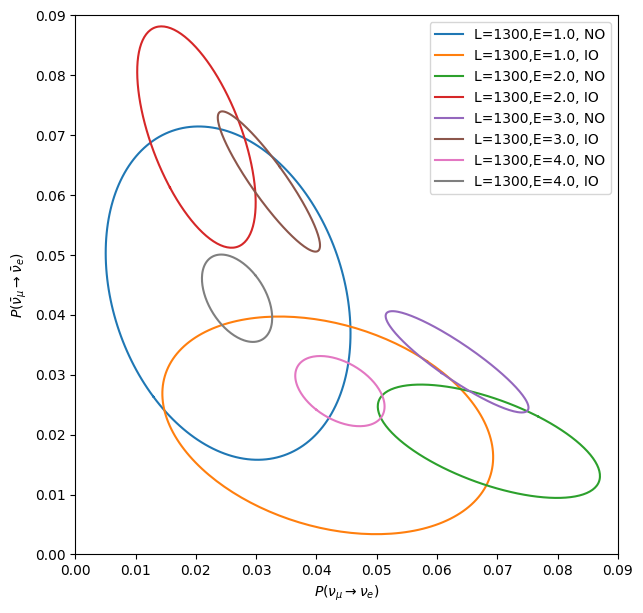

In [5]:
op_nufit = {}
op_nufit["Dmsq21"] = 7.41e-5 # units for the Dmsq's are eV^2
op_nufit["Dmsq31"] = 2.511e-3
op_nufit["s12sq"]  = 0.303
op_nufit["s23sq"]  = 0.572
op_nufit["s13sq"]  = 0.022
op_nufit["delta"]  = -5 * np.pi / 7

import copy
#
# Make ourselves a copy of the oscillation parameters. Flip the masses for the
# inverted ordering keeping deltam^2_32 the same.
#
oscpNO = copy.deepcopy(op_nufit)
oscpIO = copy.deepcopy(op_nufit)
oscpIO['Dmsq31'] = oscpIO['Dmsq21']-2.498e-3
print(oscpNO)
print(oscpIO)
#
# Choose a baseline and energies
#
L  = 1300 # km
# Es = [1.0, 1.5, 2.0, 2.5, 3.0]
Es = [1.0, 2.0, 3.0, 4.0]
#
# Get a range of delta CP values to plot for
#
import math
import numpy as np
deltaCP = math.pi*np.arange(-1,1.01,0.01)
#
# Make and fill arrays for the oscillation probabilities
#
PmeNO  = np.empty(len(deltaCP))
PmebNO = np.empty(len(deltaCP))
PmeIO  = np.empty(len(deltaCP))
PmebIO = np.empty(len(deltaCP))
mu  = 1
e   = 0
rho = 2.7 # g/cc

import matplotlib.pyplot as plt
plt.figure(figsize=[7,7])
for E in Es:
  for i in range(len(deltaCP)):
   oscpNO['delta'] = deltaCP[i]
   oscpIO['delta'] = deltaCP[i]
   PmeNO [i] = Probability(mu, e, L,  E, rho, oscpNO)
   PmebNO[i] = Probability(mu, e, L, -E, rho, oscpNO)
   PmeIO [i] = Probability(mu, e, L,  E, rho, oscpIO)
   PmebIO[i] = Probability(mu, e, L, -E, rho, oscpIO)
  plt.plot(PmeNO, PmebNO, label='L=%.0f,E=%.1f, NO'%(L,E))
  plt.plot(PmeIO, PmebIO, label='L=%.0f,E=%.1f, IO'%(L,E))

plt.xlim([0,0.09])
plt.ylim([0,0.09])
plt.xlabel(r'$P(\nu_\mu \rightarrow \nu_e)$')
plt.ylabel(r'$P(\bar{\nu}_\mu \rightarrow \bar{\nu}_e)$')
plt.legend()


Comments:
- at 1 GeV, the two ellipses overlap --> no great MO separation
- at 2 GeV, we get better MO separation, and ellipses are not very squeezed --> good $\delta_{CP}$ determination
- at 3 and 4 GeV, ellipses are less separated wrt 2 GeV case, but are more squeezed in one dimension --> no good $\delta_{CP}$ determination

Questions:
- for fixed E, why ellipses are not symmetric?
- why do NO-IO flip in going from 1 GeV to 2 GeV? (NO is on the left side and the on the right side)


## Plot oscillation probability

In [9]:
import numpy as np

op_nufit = {}
op_nufit["Dmsq21"] = 7.41e-5 # units for the Dmsq's are eV^2
op_nufit["Dmsq31"] = 2.511e-3
op_nufit["s12sq"]  = 0.303
op_nufit["s23sq"]  = 0.572
op_nufit["s13sq"]  = 0.022
# op_nufit["delta"]  = -5 * np.pi / 7
op_nufit["delta"]  = np.pi / 2

a = 1 / 3500

def prob_numu2nue(energy, baseline=1300, ordering=1):

    aL = a * baseline
    print("\n")
    print(aL)

    appo1 = 4 * op_nufit["s13sq"] * (1 - op_nufit["s13sq"])
    delta_31 = 1.267 * op_nufit["Dmsq31"] * baseline * 1000 / energy
    appo2 = np.sin( delta_31 - ordering*aL) / (delta_31 - ordering*aL)
    p_atm = op_nufit["s23sq"] * appo1 * np.power(appo2, 2) * delta_31**2
    print(np.sqrt(p_atm).max())

    appo3 = 4 * op_nufit["s12sq"] * (1 - op_nufit["s12sq"])
    delta_21 = 1.267 * op_nufit["Dmsq21"] * baseline * 1000 / energy
    appo4 = np.sin(aL) / aL
    p_sol = (1 - op_nufit["s23sq"]) * appo3 * np.power(appo4, 2) * delta_21**2
    print(np.sqrt(p_sol).max())

    dmsq32 = op_nufit["Dmsq31"] - op_nufit["Dmsq21"]
    delta_32 = 1.267 * dmsq32 * baseline * 1000 / energy
    appo5 = np.cos(delta_32) * np.cos(op_nufit["delta"] - ordering * np.sin(delta_32 * np.sin(op_nufit["delta"])))
    p_int = 2 * np.sqrt(p_atm * p_sol) * appo5
    print(p_int.max())

    return p_atm + p_sol + p_int

# def prob_numu2numu(energy, baseline=1300, ordering=1):






0.0842857142857143
0.233907615727766
0.16633823538401746
0.021786945536226187


0.0842857142857143
0.2192204063024767
0.16633823538401746
0.01569358389702726


0.23142857142857146
0.25550769802587375
0.45319565499475833
0.07948181185954226


0.23142857142857146
0.21868412889899494
0.45319565499475833
0.024279222888824524


0.34285714285714286
0.27219442756992474
0.6642375680076021
0.12979352453362594


0.34285714285714286
0.21891412070141938
0.6642375680076021
0.09676783471939439


Text(0.5, 0, 'nu energy [GeV]')

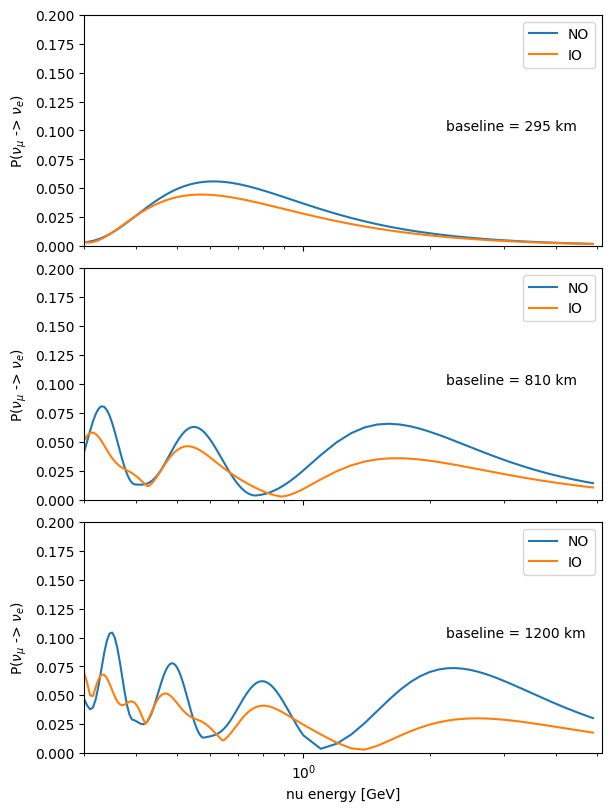

In [15]:
# energy = np.arange(0.1, 5, 0.01) # GeV
energy = np.concatenate((
    np.arange(0.1,1,0.005),
    np.arange(1, 5, 0.1)
))
baselines = [295, 810, 1200]

fig, axes = plt.subplots(3, 1, constrained_layout=True, figsize=[6,8], sharex=True)

for ii, ax in enumerate(axes):
    bsl = baselines[ii]
    prob = prob_numu2nue(energy*1000, baseline=bsl)
    prob2 = prob_numu2nue(energy*1000, baseline=bsl, ordering=-1)

    ax.plot(energy, prob, label="NO")
    ax.plot(energy, prob2, label="IO")

    ax.legend()
    ax.set_ylabel(r"P($\nu_{\mu}$ -> $\nu_e$)")
    text = f"baseline = {bsl} km"
    ax.text(0.7, 0.5, text, transform=ax.transAxes)
    ax.set_ylim(bottom=0, top=0.2)
    ax.set_xlim(left=0.3)
    ax.semilogx()

axes[-1].set_xlabel("nu energy [GeV]")

In [21]:
prob